In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("Threats.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40001,0.012996,tcp,-,FIN,16,18,1540,1644,2539.242797,...,1,6,0,0,0,5,7,0,Normal,0
1,40002,0.004119,tcp,-,FIN,12,12,1064,2260,5583.879675,...,1,1,0,0,0,3,8,0,Normal,0
2,40003,0.000988,udp,dns,CON,2,2,146,178,3036.437382,...,1,2,0,0,0,7,2,0,Normal,0
3,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,136.718127,...,1,1,0,0,0,4,1,0,Normal,0
4,40005,0.193943,tcp,-,FIN,72,74,4238,63618,747.642372,...,1,5,0,0,0,6,12,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
135337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
135338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
135339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [4]:
le_proto = LabelEncoder()
le_service = LabelEncoder()
le_state = LabelEncoder()
le_attack_cat= LabelEncoder()
df['proto_n'] = le_proto.fit_transform(df['proto'])
df['service_n'] = le_proto.fit_transform(df['service'])
df['state_n'] = le_proto.fit_transform(df['state'])
df['attack_cat_n'] = le_proto.fit_transform(df['attack_cat'])
df = df.drop(['proto','service','state', 'attack_cat'], axis = 'columns')
df

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto_n,service_n,state_n,attack_cat_n
0,40001,0.012996,16,18,1540,1644,2539.242797,31,29,8.888889e+05,...,0,0,5,7,0,0,111,0,1,6
1,40002,0.004119,12,12,1064,2260,5583.879675,31,29,1.895606e+06,...,0,0,3,8,0,0,111,0,1,6
2,40003,0.000988,2,2,146,178,3036.437382,31,29,5.910931e+05,...,0,0,7,2,0,0,117,2,0,6
3,40004,3.415787,230,238,24344,29556,136.718127,31,29,5.676935e+04,...,0,0,4,1,0,0,111,11,1,6
4,40005,0.193943,72,74,4238,63618,747.642372,31,29,1.724218e+05,...,0,0,6,12,0,0,111,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135336,175337,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,24,24,0,1,117,2,2,5
135337,175338,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,...,0,0,1,1,0,1,111,0,1,8
135338,175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,3,12,0,1,117,2,2,5
135339,175340,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,30,30,0,1,117,2,2,5


In [5]:
X = df.drop("attack_cat_n", axis = 1)
Y = df['attack_cat_n']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)


clf = DecisionTreeClassifier(criterion="entropy", random_state=100,max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

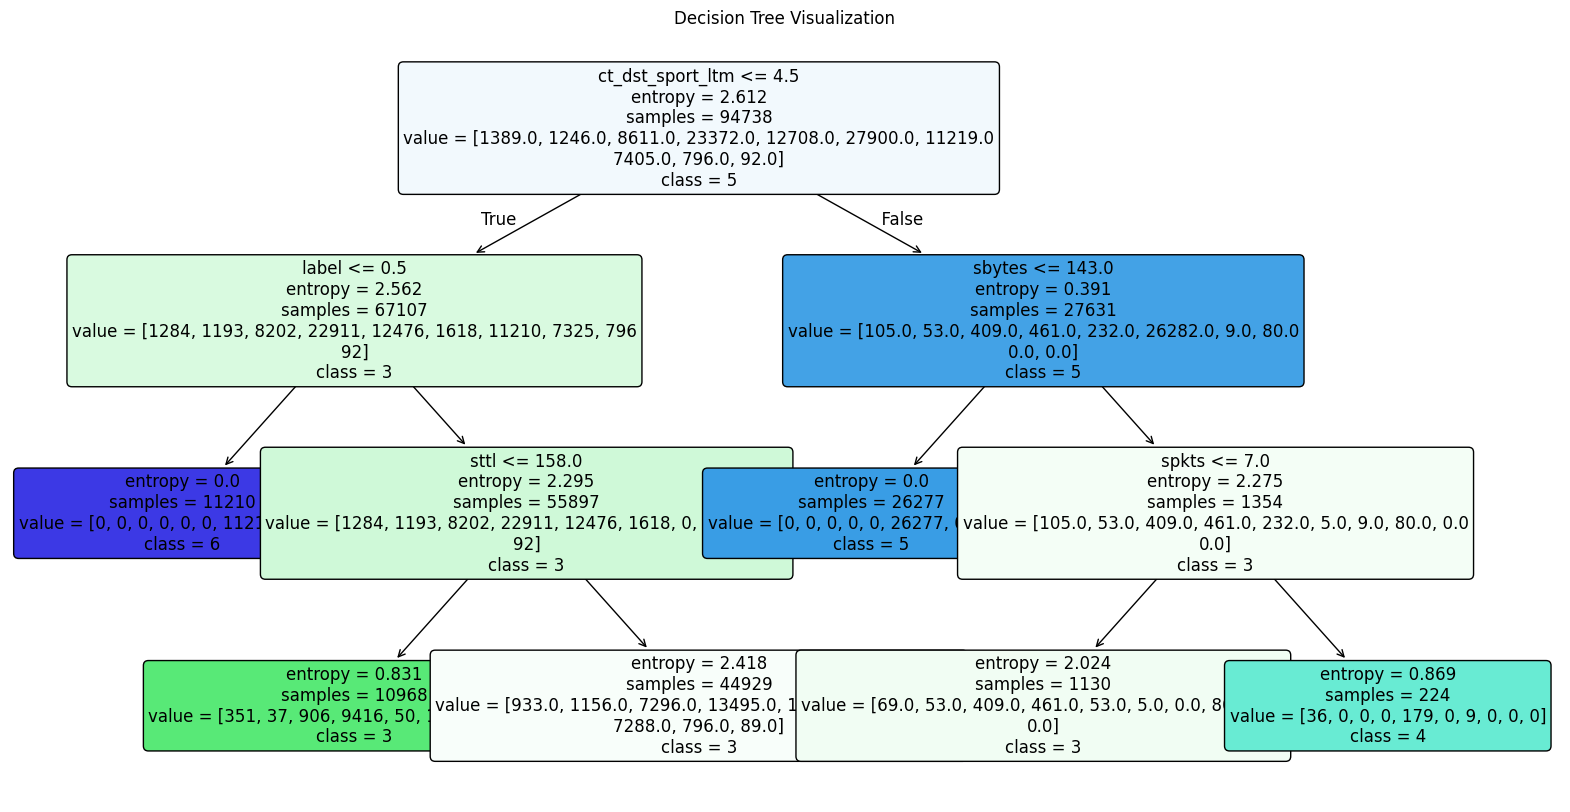

In [6]:
plt.figure(figsize=(20, 10)) 
class_names = clf.classes_.astype(str)
plot_tree(
    clf, 
    feature_names=X.columns,  # Replace with your dataset's feature names
    class_names= class_names,  # Replace with your class names
    filled=True, 
    rounded=True, 
    fontsize=12
)
plt.title("Decision Tree Visualization")
plt.show()

In [11]:
print(clf.score(X,Y))
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)*100

0.6450964600527557


64.69965273501957